In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## Linear Regression using the normal Equation

In [2]:
"""Start by looking at the Linear Regression model, 
one of the simplest models there is. 
We will discuss two very different ways to train it: Using a direct “closed-form” equation that directly 
computes the model parameters that best fit the model to the training set (i.e., the model parameters 
that minimize the cost function over the training set). Using an iterative optimization approach, 
called Gradient Descent (GD), that gradually tweaks the model parameters to minimize the cost 
function over the training set, eventually converging to the same set of parameters as the first method. 
We will look at a few variants of Gradient Descent that we will use again and again when we study neural 
networks in Part II: Batch GD, Mini-batch GD, and Stochastic GD."""

'Start by looking at the Linear Regression model, \none of the simplest models there is. \nWe will discuss two very different ways to train it: Using a direct “closed-form” equation that directly \ncomputes the model parameters that best fit the model to the training set (i.e., the model parameters \nthat minimize the cost function over the training set). Using an iterative optimization approach, \ncalled Gradient Descent (GD), that gradually tweaks the model parameters to minimize the cost \nfunction over the training set, eventually converging to the same set of parameters as the first method. \nWe will look at a few variants of Gradient Descent that we will use again and again when we study neural \nnetworks in Part\xa0II: Batch GD, Mini-batch GD, and Stochastic GD.'

In [3]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

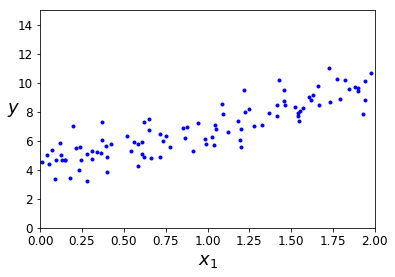

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Use the inv() function from linalg module to compute the inverse of a matrix, and the dot() method for matrix multiplication

In [5]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[ 4.21509616],
       [ 2.77011339]])

We would have hoped for 4 and 3 but noise made in impossible to recover the exact parameters of the original function

Now we can make predictions

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.21509616],
       [ 9.75532293]])

#plot predictions

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

The normal equation computes the inverse of x^T x X, which is an n x n matrix(where n is the number of features). The normal equation gets very slow when the number of features grows large(e.g., 100,000)

## Gradient Descent

Gradient descent is a very generic optimization algorithm capable of finding optimal solutions ot a wide range of problems. The general idea of gradient descent is to tweak parameters iteratively in order to minimize a cost function

Start by filling 0 with random values(random initialization) and then improve gradually, one step at a time, each stop attempting to decrease the cost function until algorithm converges to a minium. An important parameter in gradient descent is the size of the steps, determined by the learning rate hyperparameter.

If the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution

In [8]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [9]:
theta

array([[ 4.21509616],
       [ 2.77011339]])

In [10]:
X_new_b.dot(theta)

array([[ 4.21509616],
       [ 9.75532293]])

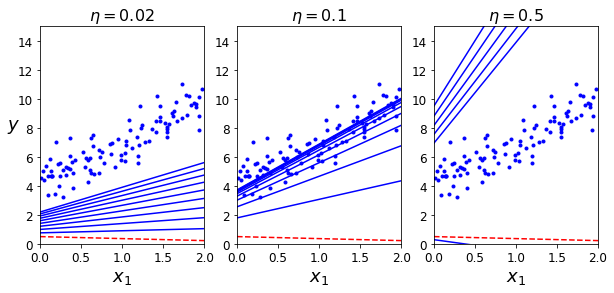

In [11]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

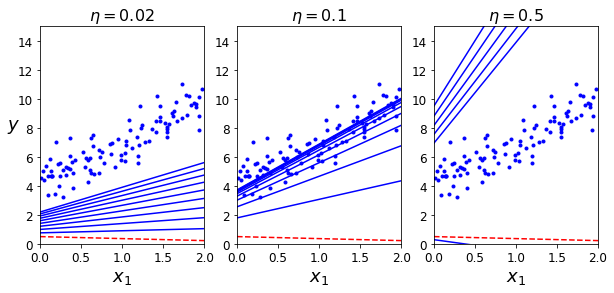

In [12]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

On the left, the learning rate is too low. We will get a solution but it will take too long. The right graph is too high, getting further away at each step. The middle graph is idea.

## Stochastic Gradient Descent

Stochastic gradient descent picks a random instance in the training set at every step and computes the gradients based only on that single instance. This makes the training much faster which allows for larger data sets

Instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum but once it gets there it will continue to bounce around.

In [13]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

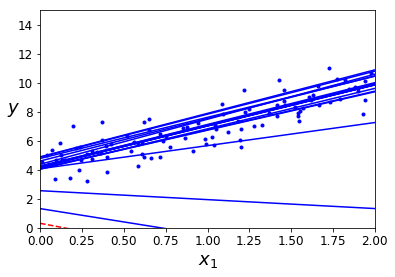

In [16]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown                              # not shown
plt.show()        

In [17]:
theta

array([[ 4.18545376],
       [ 2.77900595]])

In [20]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1, random_state=42)